23791.92425775528

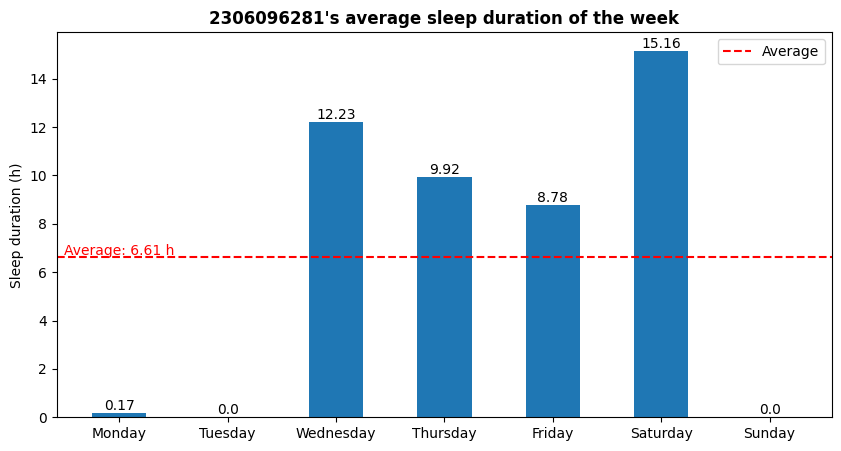

In [38]:
import csv
import time
from datetime import datetime, timedelta
from typing import List, Union
from matplotlib import pyplot as plt
import numpy as np
def get_average_sleep_duration(user_id: str) -> float:
    csv_path = f"D:/Bi_Gu-bot/Bi_Gu-bot/src/data/sleep/user_data/{user_id}.csv"
    with open(csv_path, mode = "r", encoding = "utf-8") as file:
        data = list(csv.reader(file))
    today = datetime.strptime(datetime.today().strftime("%Y-%m-%d"), "%Y-%m-%d")
    start_of_week = today - timedelta(days = today.weekday())
    start_of_each_day = [datetime.timestamp(start_of_week + timedelta(days = i)) for i in range(8)]
    sleep_durations_day = []
    for i in range(len(start_of_each_day) - 1):
        start_of_day = start_of_each_day[i]
        end_of_day = start_of_each_day[i+1] - 1
        sleep_durations = []
        start_index, stop_index = -1, -1
        for j in range(len(data)):
            if float(data[j][0]) >= start_of_day:
                start_index = j
                break
        for j in range(len(data)-1, 0, -1):
            if float(data[j][0]) < end_of_day:
                stop_index = j
                break
        for i in range(start_index, stop_index + 1, 2):
            if start_index == -1: continue
            sleep_durations.append(float(data[i+1][0]) - float(data[i][0]))
        sleep_durations_day.append(sum(sleep_durations))
    average_sleep_duration = np.mean(sleep_durations_day)
    plt.style.use('default')
    plt.figure(figsize = (10, 5))
    sleep_durations_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    bars = plt.bar(sleep_durations_name, [x/3600 for x in sleep_durations_day], width = 0.5)
    for bar, value in zip(bars, sleep_durations_day):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(value/3600, 2), ha = "center", va = "bottom")
    plt.text(0, average_sleep_duration/3600, f"Average: {round(average_sleep_duration/3600, 2)} h", ha = "center", va = "bottom", color = "r")
    plt.axhline(y = average_sleep_duration/3600, color = "r", linestyle = "--", label = "Average")
    plt.title(f"{user_id}'s average sleep duration of the week", fontweight = "bold")
    plt.ylabel("Sleep duration (h)")
    plt.legend()
    plt.savefig(f"D:/Bi_Gu-bot/Bi_Gu-bot/src/data/sleep/user_data/{user_id}.png", dpi = 300, bbox_inches = "tight")
    return average_sleep_duration

get_average_sleep_duration("2306096281")